# Profiling du dataset *Demande de valeurs foncières (DVF)*

Dans ce notebook, on évalue l'exploitabilité du jeu de données *Demande de valeurs foncières* (https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/) par des algorithmes de Machine Learning, en se restreignant aux jeux de données de 2020, 2019 et 2018.
Ce jeu de données est très intéressant et a été très réutilisé sur *data.gouv.fr*, notamment dans la prédiction des prix immobiliers. 

In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import des jeux de données

In [2]:
url_2020 = "https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f"
data_2020 = pd.read_csv(url_2020, sep='|')  #dataframe des demandes de valeurs foncières du premier trimestre de 2020

/home/giulia/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
#url_2019 = "https://www.data.gouv.fr/fr/datasets/r/3004168d-bec4-44d9-a781-ef16f41856a2"
#data_2019 = pd.read_csv(url_2019, sep='|') #dataframe des demandes de valeurs foncières en 2019

In [3]:
#url_2018 = "https://www.data.gouv.fr/fr/datasets/r/1be77ca5-dc1b-4e50-af2b-0240147e0346"
#data_2018 = pd.read_csv(url_2018, sep='|') #dataframe des demandes de valeurs foncières en 2018

### Profiling des DVF en 2020

Voici un aperçu complet du dataset:

In [4]:
#profile_2020 = data_2020.profile_report(correlations=None)
#profile_2020

**Corrélations**

In [10]:
def corr_plot(data):
    """Returns an heatmap of linear correlations between features"""
    corr = data.corr('pearson')
    plt.figure(figsize=(12,8))
    plot = sns.heatmap(round(corr,2), annot=True, cmap = sns.diverging_palette(10, 240, as_cmap=True), 
            center=0, mask = np.triu(np.ones_like(corr, dtype=bool)), vmin=-1, vmax=1)
    return plot

<AxesSubplot:>

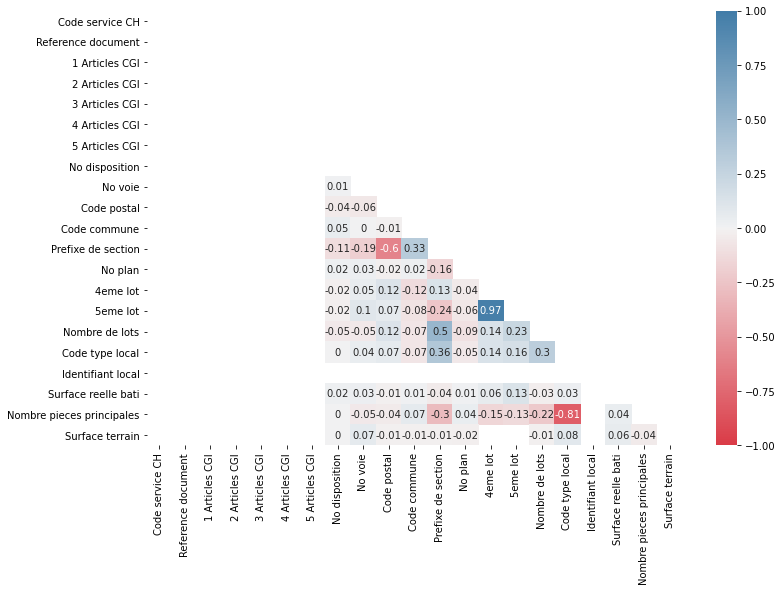

In [11]:
corr_plot(data_2020)

### Profiling des DVF en 2019

Voici un aperçu complet du dataset:

In [5]:
#profile_2019 = data_2019.profile_report(correlations=None)
#profile_2019

**Corrélations**

<AxesSubplot:>

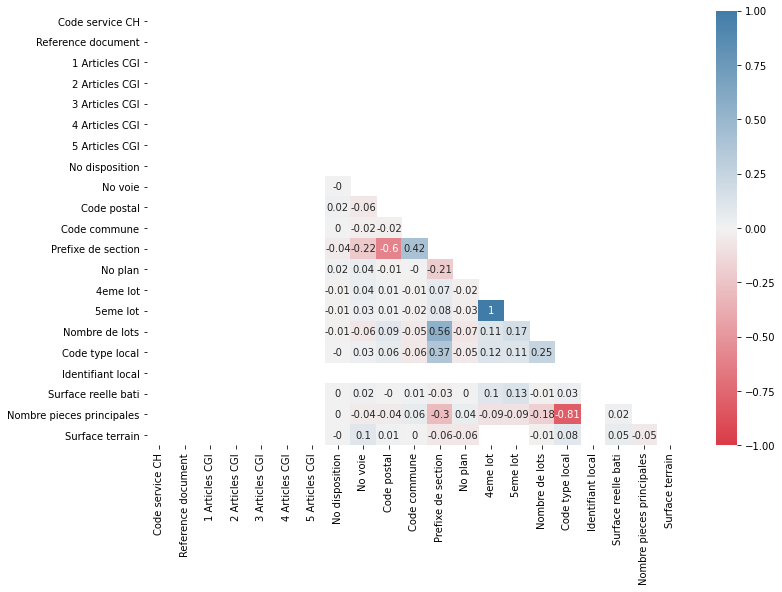

In [31]:
corr_plot(data_2019)

# Analyse de l'exploitabilité des datasets

Dataset de 2020:

- la taille du dataset est adaptée pour entraîner des modèles de ML (environ $8\times10^5$ lignes pour 43 colonnes)
- grand nombre de variables catégorielles
- 21 variables sur 43 sont composées totalement (ou quasi totalement) de valeurs manquantes; plusieurs variables  ont plus de 40% de valeurs manquantes
- classes très déséquilibrées pour plusieurs variables
- variables numériques avec des outliers importants

Les datasets de 2019 et 2018 présentent les mêmes caractéristiques du dataset de 2020. Remarquer que la taille du dataset est plus importante ici (environ 3 millions de lignes).

Ce dataset pourrait par exemple permettre de répondre à des questions telles que:
peut-on prévoir le revenu moyen d’un ménage français en fonction de sa zone géographique? Quel lien entre la taille du ménage et son indice de pauvreté?